## Stacking and Blending
Stacked Generalization or “Stacking” for short is an ensemble machine learning algorithm.It involves combining the predictions from multiple machine learning odels on the same dataset, like bagging and boosting.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will build our bagging model on the {doc}`tips </content/appendix/data>` dataset from `scikit-learn`. The hidden code cell below loads that data and does a train-test split.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on all the features.

In [ ]:
import os
path = "/gdrive/MyDrive/Bagging_Boosting/Colabs/Decision Tree Colab/"
os.chdir(path)
!ls
wbc = pd.read_csv(path+'data.csv')
wbc.head()

data.csv  data.gsheet  ML_11_decision_tree_classification.ipynb


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = wbc.drop(['diagnosis','Unnamed: 32','id'],axis=1)
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [ ]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

### Compare the base model performance

In [ ]:
# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['dt'] = DecisionTreeClassifier()
 models['bayes'] = GaussianNB()
 return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [ ]:
models = get_models()
results = pd.DataFrame()
# evaluate the models and store results
# results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results[name] = scores
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.947 (0.029)
>knn 0.934 (0.030)
>dt 0.927 (0.035)
>bayes 0.939 (0.030)


<Axes: >

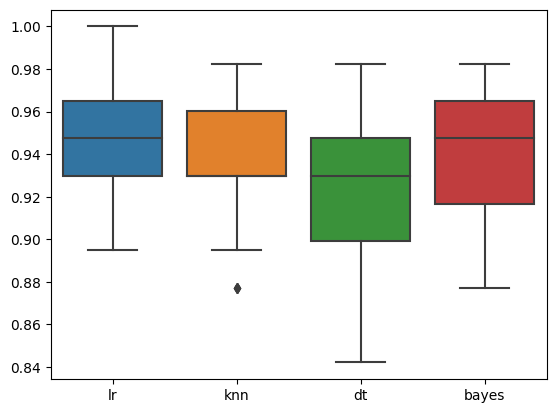

In [ ]:
sns.boxplot(results)

### Train a stacked model

In [ ]:
# get a stacking ensemble of models
def get_stacking():
 # define the base models
 base_models = list()
 base_models.append(('lr', LogisticRegression()))
 base_models.append(('knn', KNeighborsClassifier()))
 base_models.append(('decision_tree', DecisionTreeClassifier()))
 base_models.append(('bayes', GaussianNB()))
 # define meta learner model
 meta_model = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)
 return model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
stacked_model = get_stacking().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### Use the stacked model to make predictions

In [ ]:
stacked_model.predict(X_test[:100])

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
accuracy_score(stacked_model.predict(X_test),y_test)

0.9649122807017544

### Stacked model along with base signals

 Get a stacking ensemble of models with base signals to the
 meta model  for this we set the passthrough argument to true

In [ ]:
def get_stacking_with_base_signals():
 # define the base models
 base_models = list()
 base_models.append(('lr', LogisticRegression()))
 base_models.append(('knn', KNeighborsClassifier()))
 base_models.append(('decision_tree', DecisionTreeClassifier()))
 base_models.append(('bayes', GaussianNB()))
 # define meta learner model
 meta_model = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=True, cv=10)
 return model

In [ ]:
stacked_model_with_base_signals = get_stacking_with_base_signals().fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
accuracy_score(stacked_model_with_base_signals.predict(X_test),y_test)

0.9649122807017544

In this case we saw a drop in accuracy by providing the meta model with base model signals as well.

### Compare the performance of the stacked model

In [ ]:
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [ ]:
# get a list of models to evaluate
def get_all_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['dt'] = DecisionTreeClassifier()
 models['bayes'] = GaussianNB()
 models['stacked'] = get_stacking()
 models['stacked_w_base'] = get_stacking_with_base_signals()
 return models

>lr 0.949 (0.035)
>knn 0.929 (0.039)
>dt 0.924 (0.031)
>bayes 0.940 (0.032)
>stacked 0.955 (0.029)
>stacked_w_base 0.945 (0.033)


<Axes: >

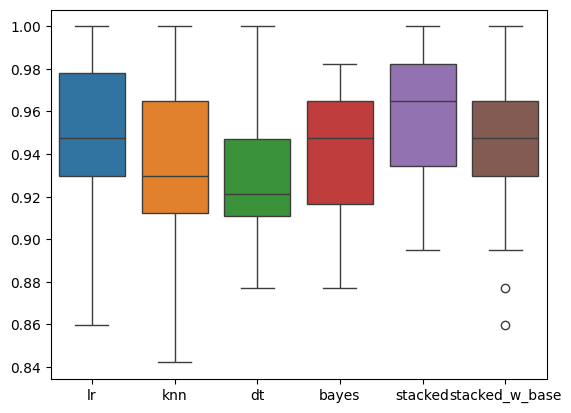

In [ ]:
models = get_all_models()
# evaluate the models and store results
results = pd.DataFrame()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results[name] = scores
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
sns.boxplot(results)

The stacked model outperforms the best model.

Cascading examples

In [ ]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)
score1 = evaluate_model(dt1, X, y)

# Train the second model using the predictions of the first model as input features
X_train_cascaded1 = X_train.copy()
X_train_cascaded1 = np.column_stack((X_train_cascaded1, dt1.predict(X_train)))

X_test_cascaded1 = X_test.copy()
X_test_cascaded1 = np.column_stack((X_test_cascaded1, dt1.predict(X_test)))

dt1c1 = DecisionTreeClassifier() #LogisticRegression,DecisionTreeClassifier
score1c1 = evaluate_model(dt1c1, np.concatenate([X_train_cascaded1,X_test_cascaded1]), np.concatenate([y_train,y_test]))
dt1c1.fit(X_train_cascaded1,y_train)

# Train the third model using the predictions of the second model as input features
X_train_cascaded2 = X_train_cascaded1.copy()
X_train_cascaded2 = np.column_stack((X_train_cascaded2, dt1c1.predict(X_train_cascaded1)))

X_test_cascaded2 = X_test_cascaded1.copy()
X_test_cascaded2 = np.column_stack((X_test_cascaded2, dt1c1.predict(X_test_cascaded1)))

dt1c2 = DecisionTreeClassifier()
score1c2 = evaluate_model(dt1c2, np.concatenate([X_train_cascaded2,X_test_cascaded2]), np.concatenate([y_train,y_test]))

print('>%s %.3f (%.3f)' % ('First DT', mean(score1), std(score1)))
print('>%s %.3f (%.3f)' % ('First Cascading', mean(score1c1), std(score1c1)))
print('>%s %.3f (%.3f)' % ('Second Cascading', mean(score1c2), std(score1c2)))


>First DT 0.929 (0.029)
>First Cascading 0.978 (0.019)
>Second Cascading 0.978 (0.020)


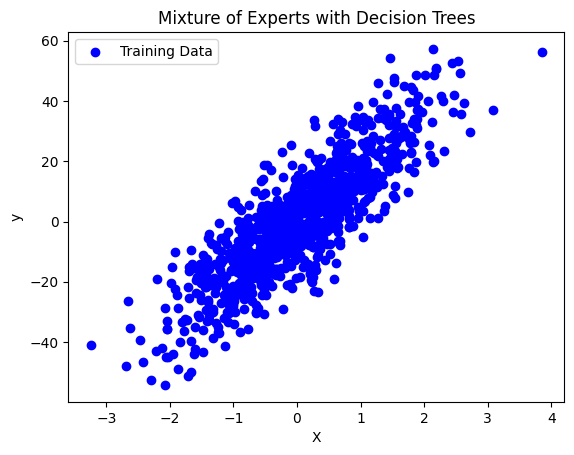

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class MixtureOfExperts:
    def __init__(self, n_experts):
        self.n_experts = n_experts
        self.experts = [LinearRegression() for _ in range(n_experts)]
        self.gating_model = LinearRegression()

    def fit(self, X, y):
        # Split the data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the gating model on the training data
        self.gating_model.fit(X_train, y_train)

        # Train each expert on a subset of the training data
        for i in range(self.n_experts):
            expert_mask = self.gate(X_train, self.experts[i])
            self.experts[i].fit(X_train[expert_mask], y_train[expert_mask])

    def predict(self, X):
        # Use the gating model to determine which expert to use for each input
        expert_predictions = np.array([expert.predict(X) for expert in self.experts]).T
        gating_predictions = self.gating_model.predict(X)

        # Weight the expert predictions based on the gating predictions
        final_predictions = np.sum(expert_predictions * gating_predictions[:, np.newaxis], axis=1)

        return final_predictions

    def gate(self, X, expert):
        # Use the gating model to determine the gating values for each input
        return self.gating_model.predict(X) >0


# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

# Create and train the Mixture of Experts model
moe_model = MixtureOfExperts(n_experts=5)
moe_model.fit(X, y)

# Make predictions on new data
new_X = np.linspace(-3, 3, 100).reshape(-1, 1)
predictions = moe_model.predict(new_X)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Training Data', color='blue')
# plt.plot(new_X, predictions, label='Mixture of Experts Predictions', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Mixture of Experts with Decision Trees')
plt.show()
new_X

In [ ]:
y

array([-3.27703860e+01,  3.50459106e+00, -1.79303077e+01, -3.99020124e+00,
        1.31052643e+01,  3.37844061e+01, -6.56837449e+00,  3.03343732e+01,
       -1.61515953e+01,  6.88348836e+00,  3.77299337e+01, -1.35859461e+01,
       -5.34641296e+00, -5.25582497e+01, -2.85959274e+01, -3.81250959e+00,
        1.01659573e+01,  2.26026891e+01, -1.24605121e+00,  7.68784791e+00,
        7.06695978e+00, -2.15775869e+01,  3.74179825e+01,  9.94439327e+00,
        4.99801294e+00, -7.39208241e+00,  4.99341060e+00,  1.81230569e+01,
       -2.67390670e+01, -1.77695628e+01, -1.19064700e+01, -2.42104879e+01,
        2.33447024e+01,  1.24361555e+01, -7.82398627e+00, -7.66234787e+00,
       -1.27512146e+01, -2.35061251e+01, -1.63287929e+01, -2.11370557e+01,
       -5.33159127e+00, -2.34534903e+01,  1.40222313e+01,  5.28020342e+00,
       -9.74097045e+00,  1.36080153e+01, -2.12908606e+01,  2.84422764e+01,
       -1.90478736e+01, -2.40605351e+01, -6.61810782e+00, -1.19610661e+01,
        5.19616459e+00,  